# Airplane Prices Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

import graphviz

!pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## A) Dataset Information

In [2]:
df = pd.read_csv('Predict Price of Airline Tickets.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df['Route'].fillna('Not_Provided',inplace=True)
df['Total_Stops'].fillna('Not_Provided',inplace=True)

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.duplicated().sum()

220

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.shape

(10463, 11)

## Comments
*The dataset consisits of 11 columns and 10463 rows.

*The are 2 NaN objects (Replaced with "Not Provided")

*The are 220 duplcated items. (Removed)

*Numerical Columns:

Price

*No Non-Numerical columns:

Airline - Date_of_Journey - Source - Destination - Route - Dep_Time - Arrival_Time - Duration - Total_Stops - Additional_Info

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## B) Data Visualization

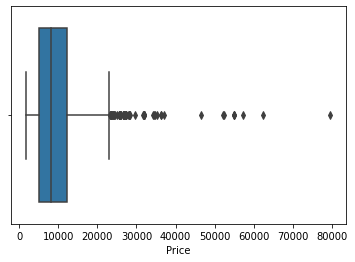

In [10]:
# detecting the outliers

sns.boxplot(x='Price', data=df)

In [11]:
#High Price Houses
df[df['Price']>70000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


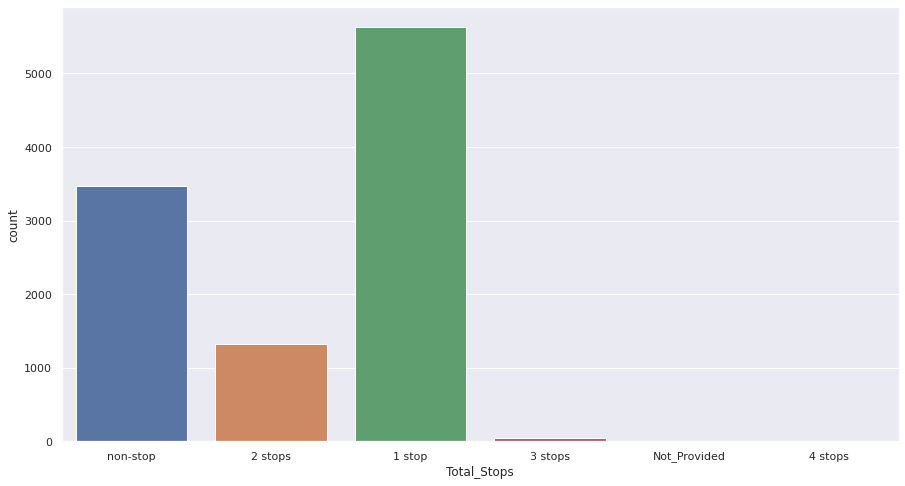

In [12]:
#Differentiating according total stops
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x='Total_Stops',data=df)

#Most passengers stop once during their trips

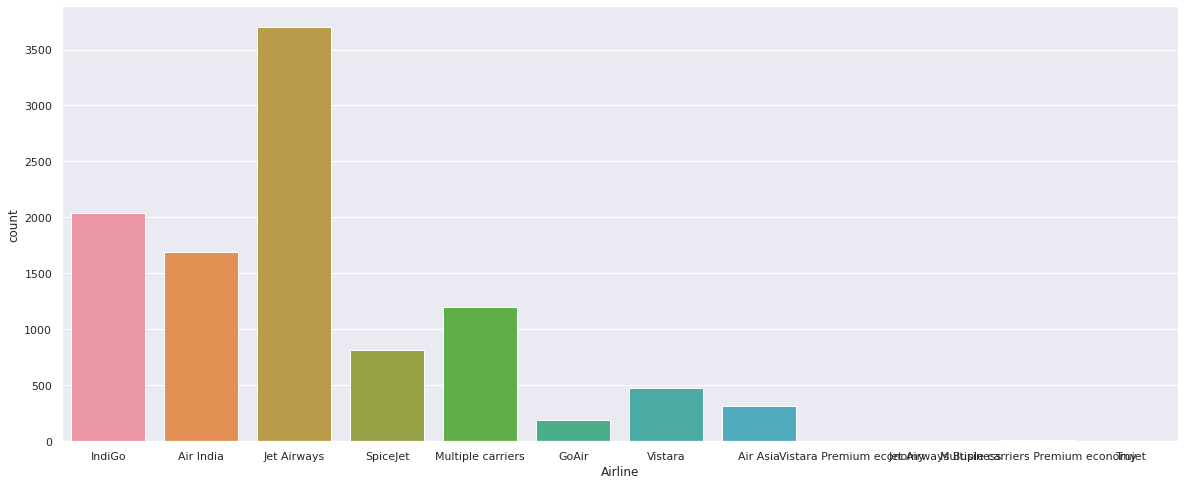

In [13]:
# Differentiating according to Airline Companies
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(data=df,x='Airline')

# Most passengers use Jet Airways

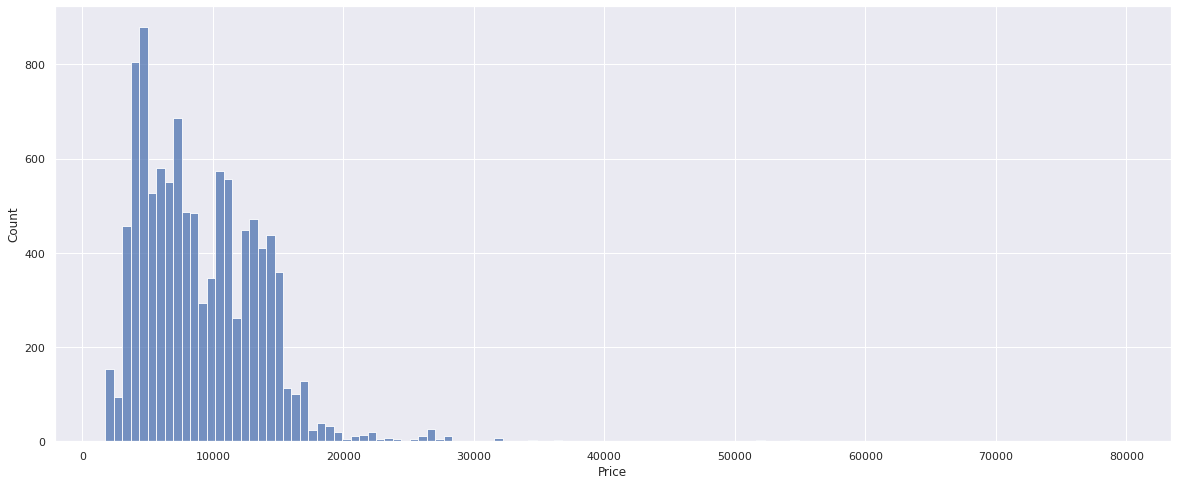

In [14]:
# Prices Histogram
sns.histplot(data=df,x='Price')

In [15]:
df['Journey_Day']=pd.DatetimeIndex(data=df['Date_of_Journey']).day
df['Journey_Month']=pd.DatetimeIndex(data=df['Date_of_Journey']).month
df.drop("Date_of_Journey", axis=1, inplace=True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


[Text(0.5, 1.0, 'Journey Month')]

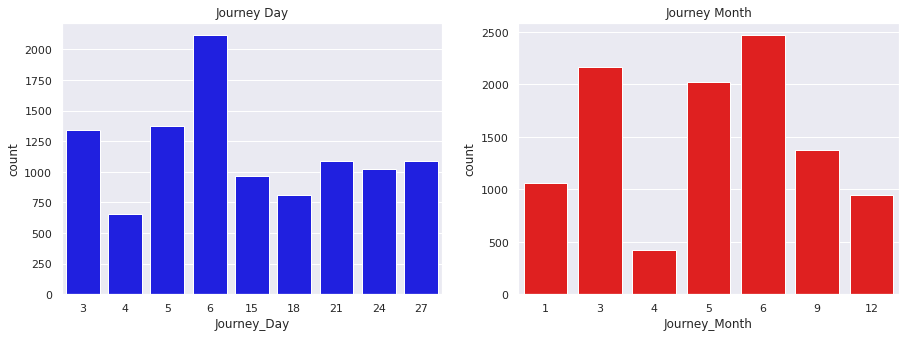

In [17]:
# Montoring Flights according to ther date
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)

sns.countplot(x='Journey_Day', data=df, color='blue',ax=axes[0]).set(title='Journey Day')
sns.countplot(x='Journey_Month', data=df, color='red',ax=axes[1]).set(title='Journey Month')
# Most flights are in day 6 from each month
# Most flights are in June

In [18]:
# Function to convert duration to minutes
def convertToMins(inDate):
  if(type(inDate)==np.int64 or type(inDate)==int):
    return inDate
  if 'h' in inDate:
    date = inDate.replace('h','')
    if 'm' in date:
      date = date.replace('m','')
    else:
      date+=' 0'
  else:
    date = '0 ' + inDate.replace('m','')
  date = date.split(' ')
  return int(date[1]) + int(date[0])*60

In [19]:
feature = list(df['Duration'])
arr = []
for i in range(len(df['Duration'])):
    arr.append(convertToMins(feature[i]))

df['Duration'] = arr

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302,3,1


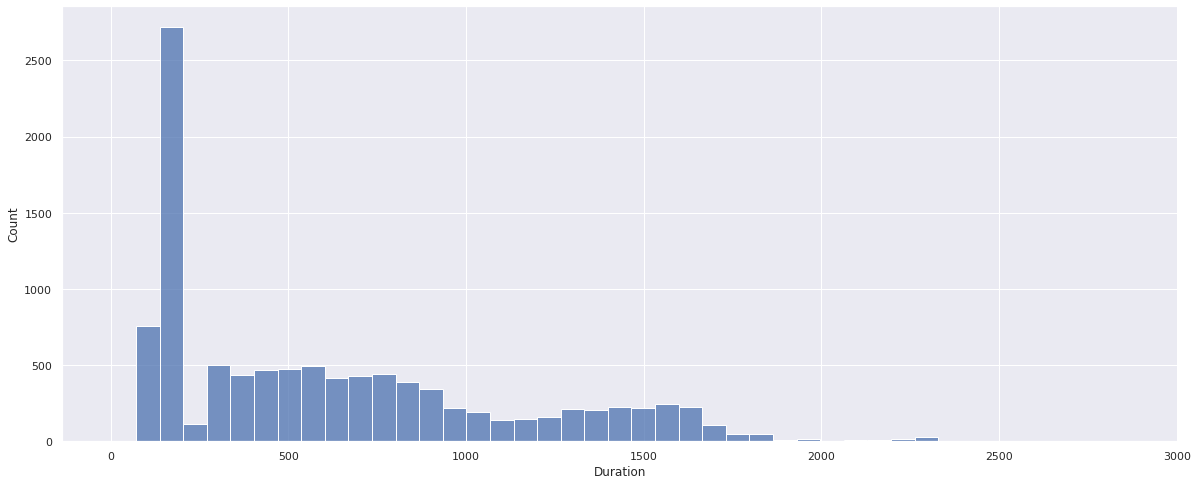

In [21]:
# Duration Histogram
sns.histplot(data=df,x='Duration')

In [22]:
#Converting Non-Numerical Columns using label encoding
le = LabelEncoder()
features = ['Airline','Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time','Total_Stops','Additional_Info']
for feature in features:
  label = le.fit_transform(df[feature])
  df.drop(feature, axis=1, inplace=True)
  df[feature] = label

In [23]:
# Correlation between dataset columns
df.corr()

,Duration,Price,Journey_Day,Journey_Month,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
Duration,1.000000,0.501645,-0.047381,0.056345,-0.153778,0.162794,-0.254257,0.273361,-0.005227,0.069462,-0.624917,-0.169842
Price,0.501645,1.000000,-0.171108,0.008657,-0.036447,0.013795,-0.065865,0.154311,0.001339,0.033727,-0.581738,-0.068794
Journey_Day,-0.047381,-0.171108,1.000000,-0.265203,0.032016,0.007829,-0.051770,0.094375,-0.008584,0.002437,0.045220,-0.019576
Journey_Month,0.056345,0.008657,-0.265203,1.000000,-0.008698,0.062742,-0.104582,0.040014,0.027982,-0.001054,-0.056863,-0.008248
Airline,-0.153778,-0.036447,0.032016,-0.008698,1.000000,-0.012175,0.015976,0.029454,-0.036567,-0.013732,0.044014,-0.058275
Source,0.162794,0.013795,0.007829,0.062742,-0.012175,1.000000,-0.589991,0.403848,0.056357,0.023395,-0.224310,-0.021585
Destination,-0.254257,-0.065865,-0.051770,-0.104582,0.015976,-0.589991,1.000000,-0.457552,-0.064574,-0.041543,0.336285,0.024907
Route,0.273361,0.154311,0.094375,0.040014,0.029454,0.403848,-0.457552,1.000000,-0.082357,0.017651,-0.442278,0.042869
Dep_Time,-0.005227,0.001339,-0.008584,0.027982,-0.036567,0.056357,-0.064574,-0.082357,1.000000,-0.033100,0.047921,-0.061282
Arrival_Time,0.069462,0.033727,0.002437,-0.001054,-0.013732,0.023395,-0.041543,0.017651,-0.033100,1.000000,-0.099746,0.012747


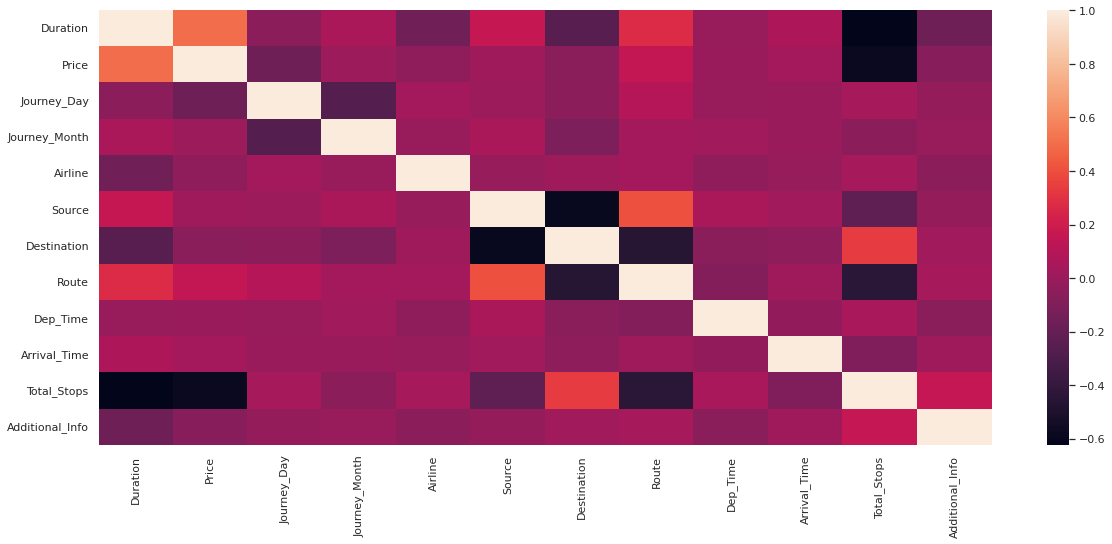

In [24]:
#Visualizing the correlation between the features:
sns.heatmap(df.corr())

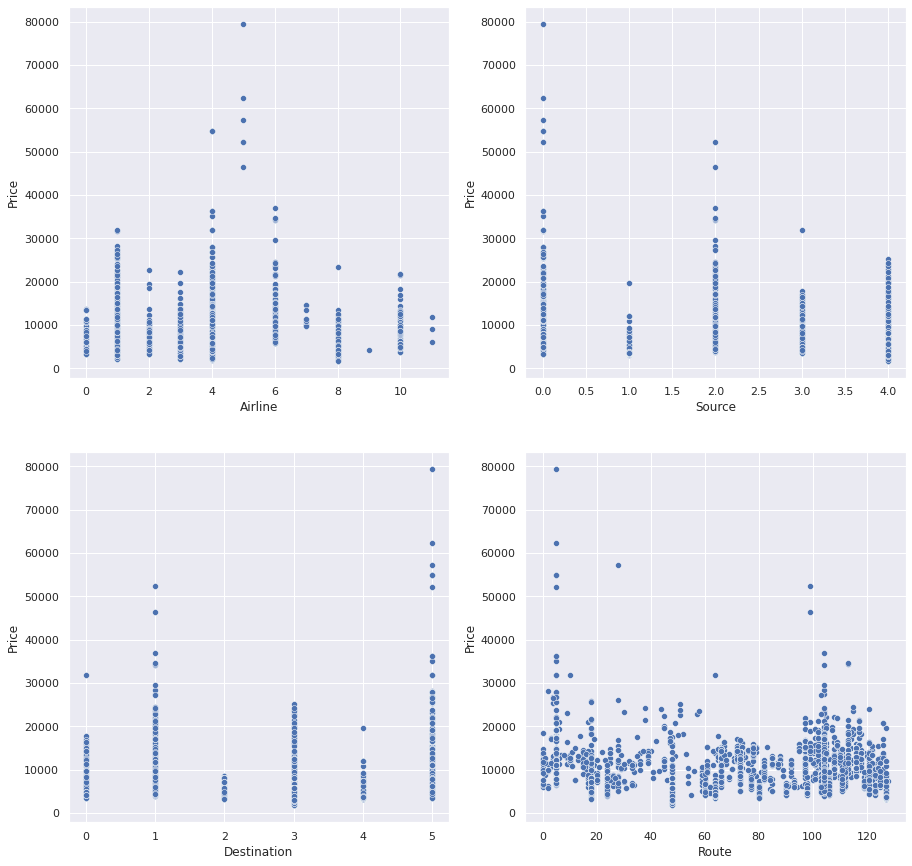

In [25]:
# Scatter Plot
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,15)

sns.scatterplot(x='Airline',y='Price',data=df,ax=axes[0,0])
sns.scatterplot(x='Source',y='Price',data=df,ax=axes[0,1])
sns.scatterplot(x='Destination',y='Price',data=df,ax=axes[1,0])
sns.scatterplot(x='Route',y='Price',data=df,ax=axes[1,1])

# Not all features can be fitted with linear regression

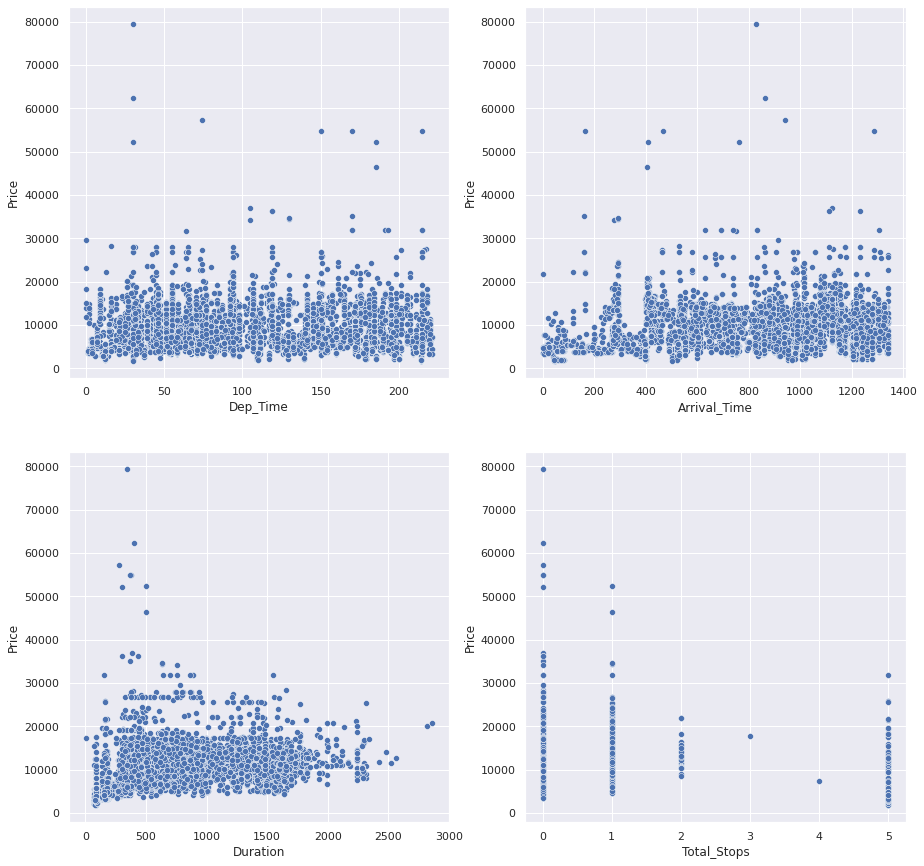

In [26]:
# Scatter Plot
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,15)

sns.scatterplot(x='Dep_Time',y='Price',data=df,ax=axes[0,0])
sns.scatterplot(x='Arrival_Time',y='Price',data=df,ax=axes[0,1])
sns.scatterplot(x='Duration',y='Price',data=df,ax=axes[1,0])
sns.scatterplot(x='Total_Stops',y='Price',data=df,ax=axes[1,1])

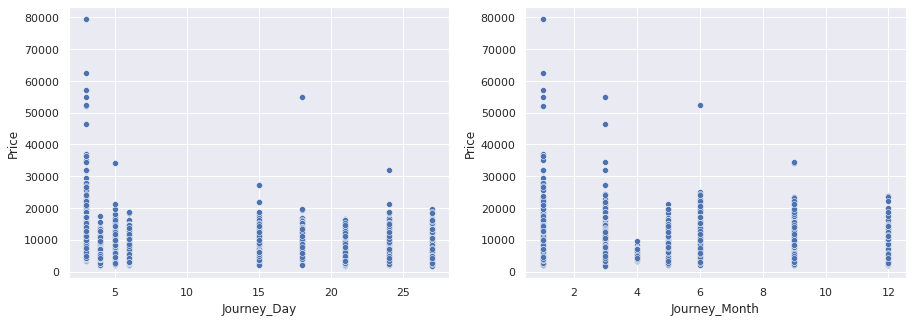

In [27]:
# Scatter Plot
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)

sns.scatterplot(x='Journey_Day',y='Price',data=df,ax=axes[0])
sns.scatterplot(x='Journey_Month',y='Price',data=df,ax=axes[1])

## Comments
*Duration and Date features were converted to numerical columns by parsing important numbers from their string

*Rest of non-numerical features were converted to numerical columns using lab encoding

*Most features have weak correlation with output

*Not all featurs can be fitted with linear regression. 

So we will try decision tree and random forrest (and aslo polynomial regression).

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Machine Learning 

In [28]:
# Splitting features and output
x = df.drop(['Price'], axis=1)
y = df['Price']

In [29]:
# First we will try polyomial regression
poly_reg = PolynomialFeatures(degree=1)
x_poly = poly_reg.fit_transform(x)

In [30]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.33,random_state=42)

In [31]:
# Multi variable polynomial regression
model_multi = linear_model.LinearRegression()

model_multi.fit(x_train,y_train)

print("A0 = ",model_multi.intercept_)

A0 =  9400.310409731379


In [32]:
# Evaluating Model by calculating Errors
y_pred = model_multi.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)

RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)

r_score = r2_score(y_test,y_pred)
print('r_score',r_score)

MAE= mean_absolute_error(y_test,y_pred)

print('mean_absolute_error',MAE)

mean_squared_error 11371710.274487
Root_mean_squared_error 3372.19665418359
r_score 0.43467815346211247
mean_absolute_error 2457.9361394169637


In [33]:
# Increasing degree to obtain better results (degree 3)
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_poly, y, test_size=0.33,random_state=42)

new_model = linear_model.LinearRegression()
new_model.fit(x_train2,y_train2)

print("A0 = ",new_model.intercept_)

# Evaluating Model by calculating Errors
y_pred = new_model.predict(x_test2)
MSE = mean_squared_error(y_test2,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test2,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test2,y_pred)
print('mean_absolute_error',MAE)

A0 =  5976717.862257943
mean_squared_error 13368135.807469081
Root_mean_squared_error 3656.246136062106
r_score 0.33542984854240865
mean_absolute_error 1646.5353378521777


In [34]:
# Decision Tree
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.33,random_state=42)

D_T_regressor = DecisionTreeRegressor()
D_T_regressor.fit(x_train3,y_train3)

totalFeatures = ['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Journey_Day',
       'Journey_Month']

print(tree.export_text(D_T_regressor, feature_names=totalFeatures))

|--- Airline <= 327.50
|   |--- Source <= 3.50
|   |   |--- Journey_Month <= 4.00
|   |   |   |--- value: [57209.00]
|   |   |--- Journey_Month >  4.00
|   |   |   |--- Duration <= 11.50
|   |   |   |   |--- Route <= 4.50
|   |   |   |   |   |--- Duration <= 2.50
|   |   |   |   |   |   |--- value: [11873.00]
|   |   |   |   |   |--- Duration >  2.50
|   |   |   |   |   |   |--- Airline <= 315.00
|   |   |   |   |   |   |   |--- Additional_Info <= 118.50
|   |   |   |   |   |   |   |   |--- value: [22153.00]
|   |   |   |   |   |   |   |--- Additional_Info >  118.50
|   |   |   |   |   |   |   |   |--- Total_Stops <= 149.00
|   |   |   |   |   |   |   |   |   |--- value: [19225.00]
|   |   |   |   |   |   |   |   |--- Total_Stops >  149.00
|   |   |   |   |   |   |   |   |   |--- value: [13292.00]
|   |   |   |   |   |   |--- Airline >  315.00
|   |   |   |   |   |   |   |--- value: [22270.00]
|   |   |   |   |--- Route >  4.50
|   |   |   |   |   |--- value: [52229.00]
|   |   |   |--

In [35]:
# Visualizing Decision Tree

dot_data = tree.export_graphviz(D_T_regressor, out_file = None, feature_names =totalFeatures, filled=True )

graph = graphviz.Source(dot_data, format='png')
graph
graph.render('Tree', format='png', view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0978251 to fit


'Tree.png'

Text(0.5, 0, 'Relative Importance')

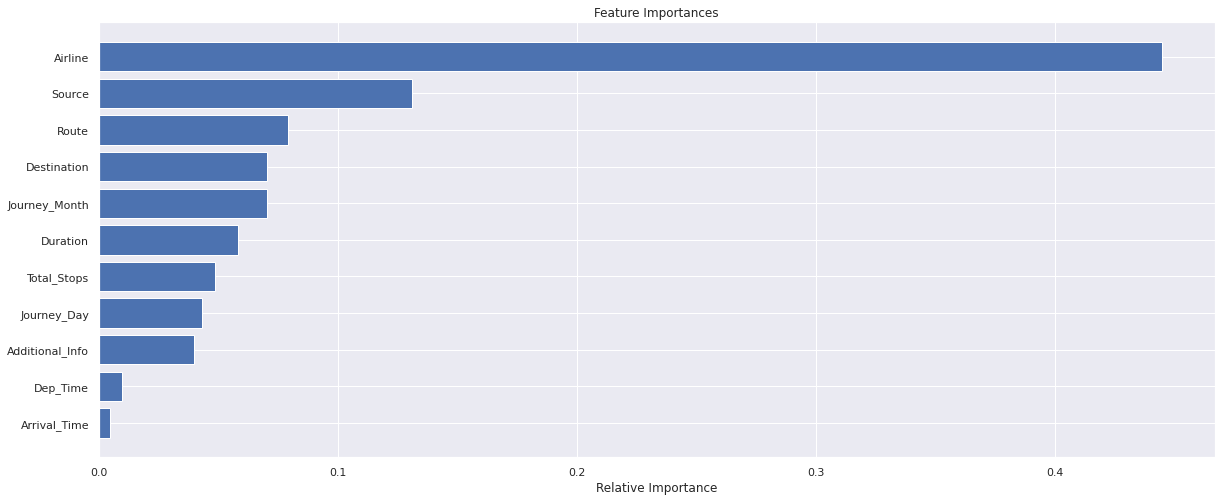

In [36]:
# Visualizing Feature Inporatances

importances = D_T_regressor.feature_importances_

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),[totalFeatures[i] for i in indices ])
plt.xlabel('Relative Importance')

In [37]:
#Model Evaluation

y_pred = D_T_regressor.predict(x_test3)
MSE = mean_squared_error(y_test3,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test3,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test3,y_pred)
print('mean_absolute_error',MAE)

mean_squared_error 3732174.294309296
Root_mean_squared_error 1931.8836130339985
r_score 0.8144624148230554
mean_absolute_error 794.4345496669563


In [38]:
# Random Forrest
regressor = RandomForestRegressor()
regressor.fit(x_train3,y_train3)

for tree_in_forest in regressor.estimators_:

  text_representaion = tree.export_text(tree_in_forest, feature_names=totalFeatures)

  print(text_representaion)

Streaming output truncated to the last 5000 lines.
|   |   |   |   |--- Journey_Day <= 0.50
|   |   |   |   |   |--- Journey_Month <= 6.50
|   |   |   |   |   |   |--- Dep_Time <= 1.00
|   |   |   |   |   |   |   |--- Destination <= 7.50
|   |   |   |   |   |   |   |   |--- Total_Stops <= 47.50
|   |   |   |   |   |   |   |   |   |--- value: [11087.00]
|   |   |   |   |   |   |   |   |--- Total_Stops >  47.50
|   |   |   |   |   |   |   |   |   |--- Airline <= 960.00
|   |   |   |   |   |   |   |   |   |   |--- value: [13502.00]
|   |   |   |   |   |   |   |   |   |--- Airline >  960.00
|   |   |   |   |   |   |   |   |   |   |--- value: [13712.00]
|   |   |   |   |   |   |   |--- Destination >  7.50
|   |   |   |   |   |   |   |   |--- Total_Stops <= 38.00
|   |   |   |   |   |   |   |   |   |--- value: [10037.00]
|   |   |   |   |   |   |   |   |--- Total_Stops >  38.00
|   |   |   |   |   |   |   |   |   |--- value: [11087.00]
|   |   |   |   |   |   |--- Dep_Time >  1.00
|   |   | 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
|   |   |   |   |   |   |   |   |--- Additional_Info <= 906.50
|   |   |   |   |   |   |   |   |   |--- Additional_Info <= 611.50
|   |   |   |   |   |   |   |   |   |   |--- Additional_Info <= 605.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Additional_Info >  605.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [6781.00]
|   |   |   |   |   |   |   |   |   |--- Additional_Info >  611.50
|   |   |   |   |   |   |   |   |   |   |--- Duration <= 116.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- Duration >  116.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |--- Additional_Info >  906.50
|   |   |   |   |   |   |   |   |   |--- Duration <= 116.50
|   |   |   |   |   |   |   |   |   |   |--- Duration <= 109.0

Text(0.5, 0, 'Relative Importance')

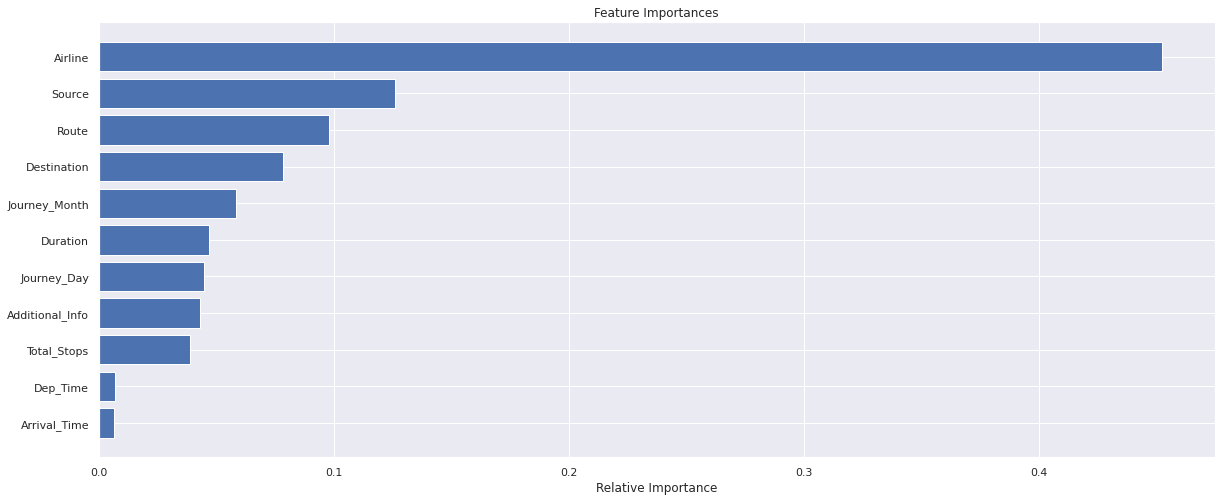

In [39]:
# Visualizing Feature Importances
importances = regressor.feature_importances_

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),[totalFeatures[i] for i in indices ])
plt.xlabel('Relative Importance')

In [40]:
#Model Evaluation

y_pred = regressor.predict(x_test3)
MSE = mean_squared_error(y_test3,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test3,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test3,y_pred)
print('mean_absolute_error',MAE)

mean_squared_error 1995304.8288660347
Root_mean_squared_error 1412.552593309727
r_score 0.9008074086453635
mean_absolute_error 677.2169989898363


## Conclusion
*The best results were obtained using random forrest.

*As observed from EDA, Decision Tree and Random Forrest Algorithms were better options.

*Most important feature in 'Airline'

*Best Obtained Model Score:

mean_squared_error 2668590.232131574

Root_mean_squared_error 1633.5820249168921

r_score 0.86543969841798

mean_absolute_error 680.2447061151177


## ----------------------------------------------------------------------------------------------------------------------------------------------------------------